In [1]:
from glob import glob
import pydicom as dicom
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
data_folder = Path('manifest-1686081801328')  # Set your data folder here
# Print metadata
metadata_df = pd.read_csv(data_folder/'metadata.csv')
metadata_df.tail()

Series UID             Collection  \
1198  1.3.6.1.4.1.5962.1.2.0.1670154536.70508.0.175.2  PDMR-Texture-Analysis   
1199     2.25.259339961548426770856948474467223213154  PDMR-Texture-Analysis   
1200      2.25.29387295326483413268654955223386905411  PDMR-Texture-Analysis   
1201   2.25.308200546840067706797055294221268540073.1  PDMR-Texture-Analysis   
1202     2.25.308200546840067706797055294221268540073  PDMR-Texture-Analysis   

     3rd Party Analysis              Data Description URI         Subject ID  \
1198                 NO  https://doi.org/10.7937/3KQ0YK19  BL0382-F1232-1728   
1199                 NO  https://doi.org/10.7937/3KQ0YK19  BL0382-F1232-1724   
1200                 NO  https://doi.org/10.7937/3KQ0YK19  BL0382-F1232-1718   
1201                 NO  https://doi.org/10.7937/3KQ0YK19  BL0382-F1232-1728   
1202                 NO  https://doi.org/10.7937/3KQ0YK19  BL0382-F1232-1728   

                                            Study UID  \
1198  1.3.6.1.4.1.5962.1.2.0.1670154536.70508.0.175.1   
1199     2.25.227126014657464343892054710446565415430   
1200      2.25.90980606448014108915274284309388447404   
1201     2.25.295695138875747345906456588608783888488   
1202     2.25.295695138875747345906456588608783888488   

                    Study Description  Study Date  Series Description  \
1198  NCI PDMR Tumor Characterization  05-20-2020  PDM Mouse Overview   
1199  NCI PDMR Tumor Characterization  07-08-2020         TSE45 split   
1200  NCI PDMR Tumor Characterization  07-08-2020         TSE45 split   
1201  NCI PDMR Tumor Characterization  06-11-2020         TSE45 split   
1202  NCI PDMR Tumor Characterization  06-11-2020         TSE45 split   

                 Manufacturer Modality                  SOP Class Name  \
1198                 PixelMed       SR  Acquisition Context SR Storage   
1199  Philips Medical Systems       MR                MR Image Storage   
1200  Philips Medical Systems       MR                MR Image Storage   
1201  Philips Medical Systems       MR                Raw Data Storage   
1202  Philips Medical Systems       MR                MR Image Storage   

                      SOP Class UID  Number of Images  File Size  \
1198  1.2.840.10008.5.1.4.1.1.88.71                 1    4.41 KB   
1199      1.2.840.10008.5.1.4.1.1.4                38   23.76 MB   
1200      1.2.840.10008.5.1.4.1.1.4                38   23.76 MB   
1201     1.2.840.10008.5.1.4.1.1.66                 1  265.46 KB   
1202      1.2.840.10008.5.1.4.1.1.4                36   22.51 MB   

                                          File Location  \
1198  .\PDMR-Texture-Analysis\BL0382-F1232-1728\05-2...   
1199  .\PDMR-Texture-Analysis\BL0382-F1232-1724\07-0...   
1200  .\PDMR-Texture-Analysis\BL0382-F1232-1718\07-0...   
1201  .\PDMR-Texture-Analysis\BL0382-F1232-1728\06-1...   
1202  .\PDMR-Texture-Analysis\BL0382-F1232-1728\06-1...   

           Download Timestamp  
1198  2023-11-06T00:04:14.479  
1199  2023-11-06T00:04:14.728  
1200  2023-11-06T00:04:16.204  
1201  2023-11-06T00:04:17.059  
1202  2023-11-06T00:04:20.999

In [3]:
level1_paths = glob(str(data_folder/'PDMR-Texture-Analysis'/'*'))
data_dict = {}
for lvl1_path in level1_paths:
    level2_paths = glob(f'{lvl1_path}/*')
    lvl2_dict = {}
    for lvl2_path in level2_paths:
        lvl3_dict = {}
        lvl3_paths = glob(f'{lvl2_path}/*')
        for scan_path in lvl3_paths:
            dcm_slices = glob(f'{scan_path}/*.dcm')
            lvl3_dict[Path(scan_path).name] = dcm_slices
        lvl2_dict[Path(lvl2_path).name] = lvl3_dict
    data_dict[Path(lvl1_path).name] = lvl2_dict

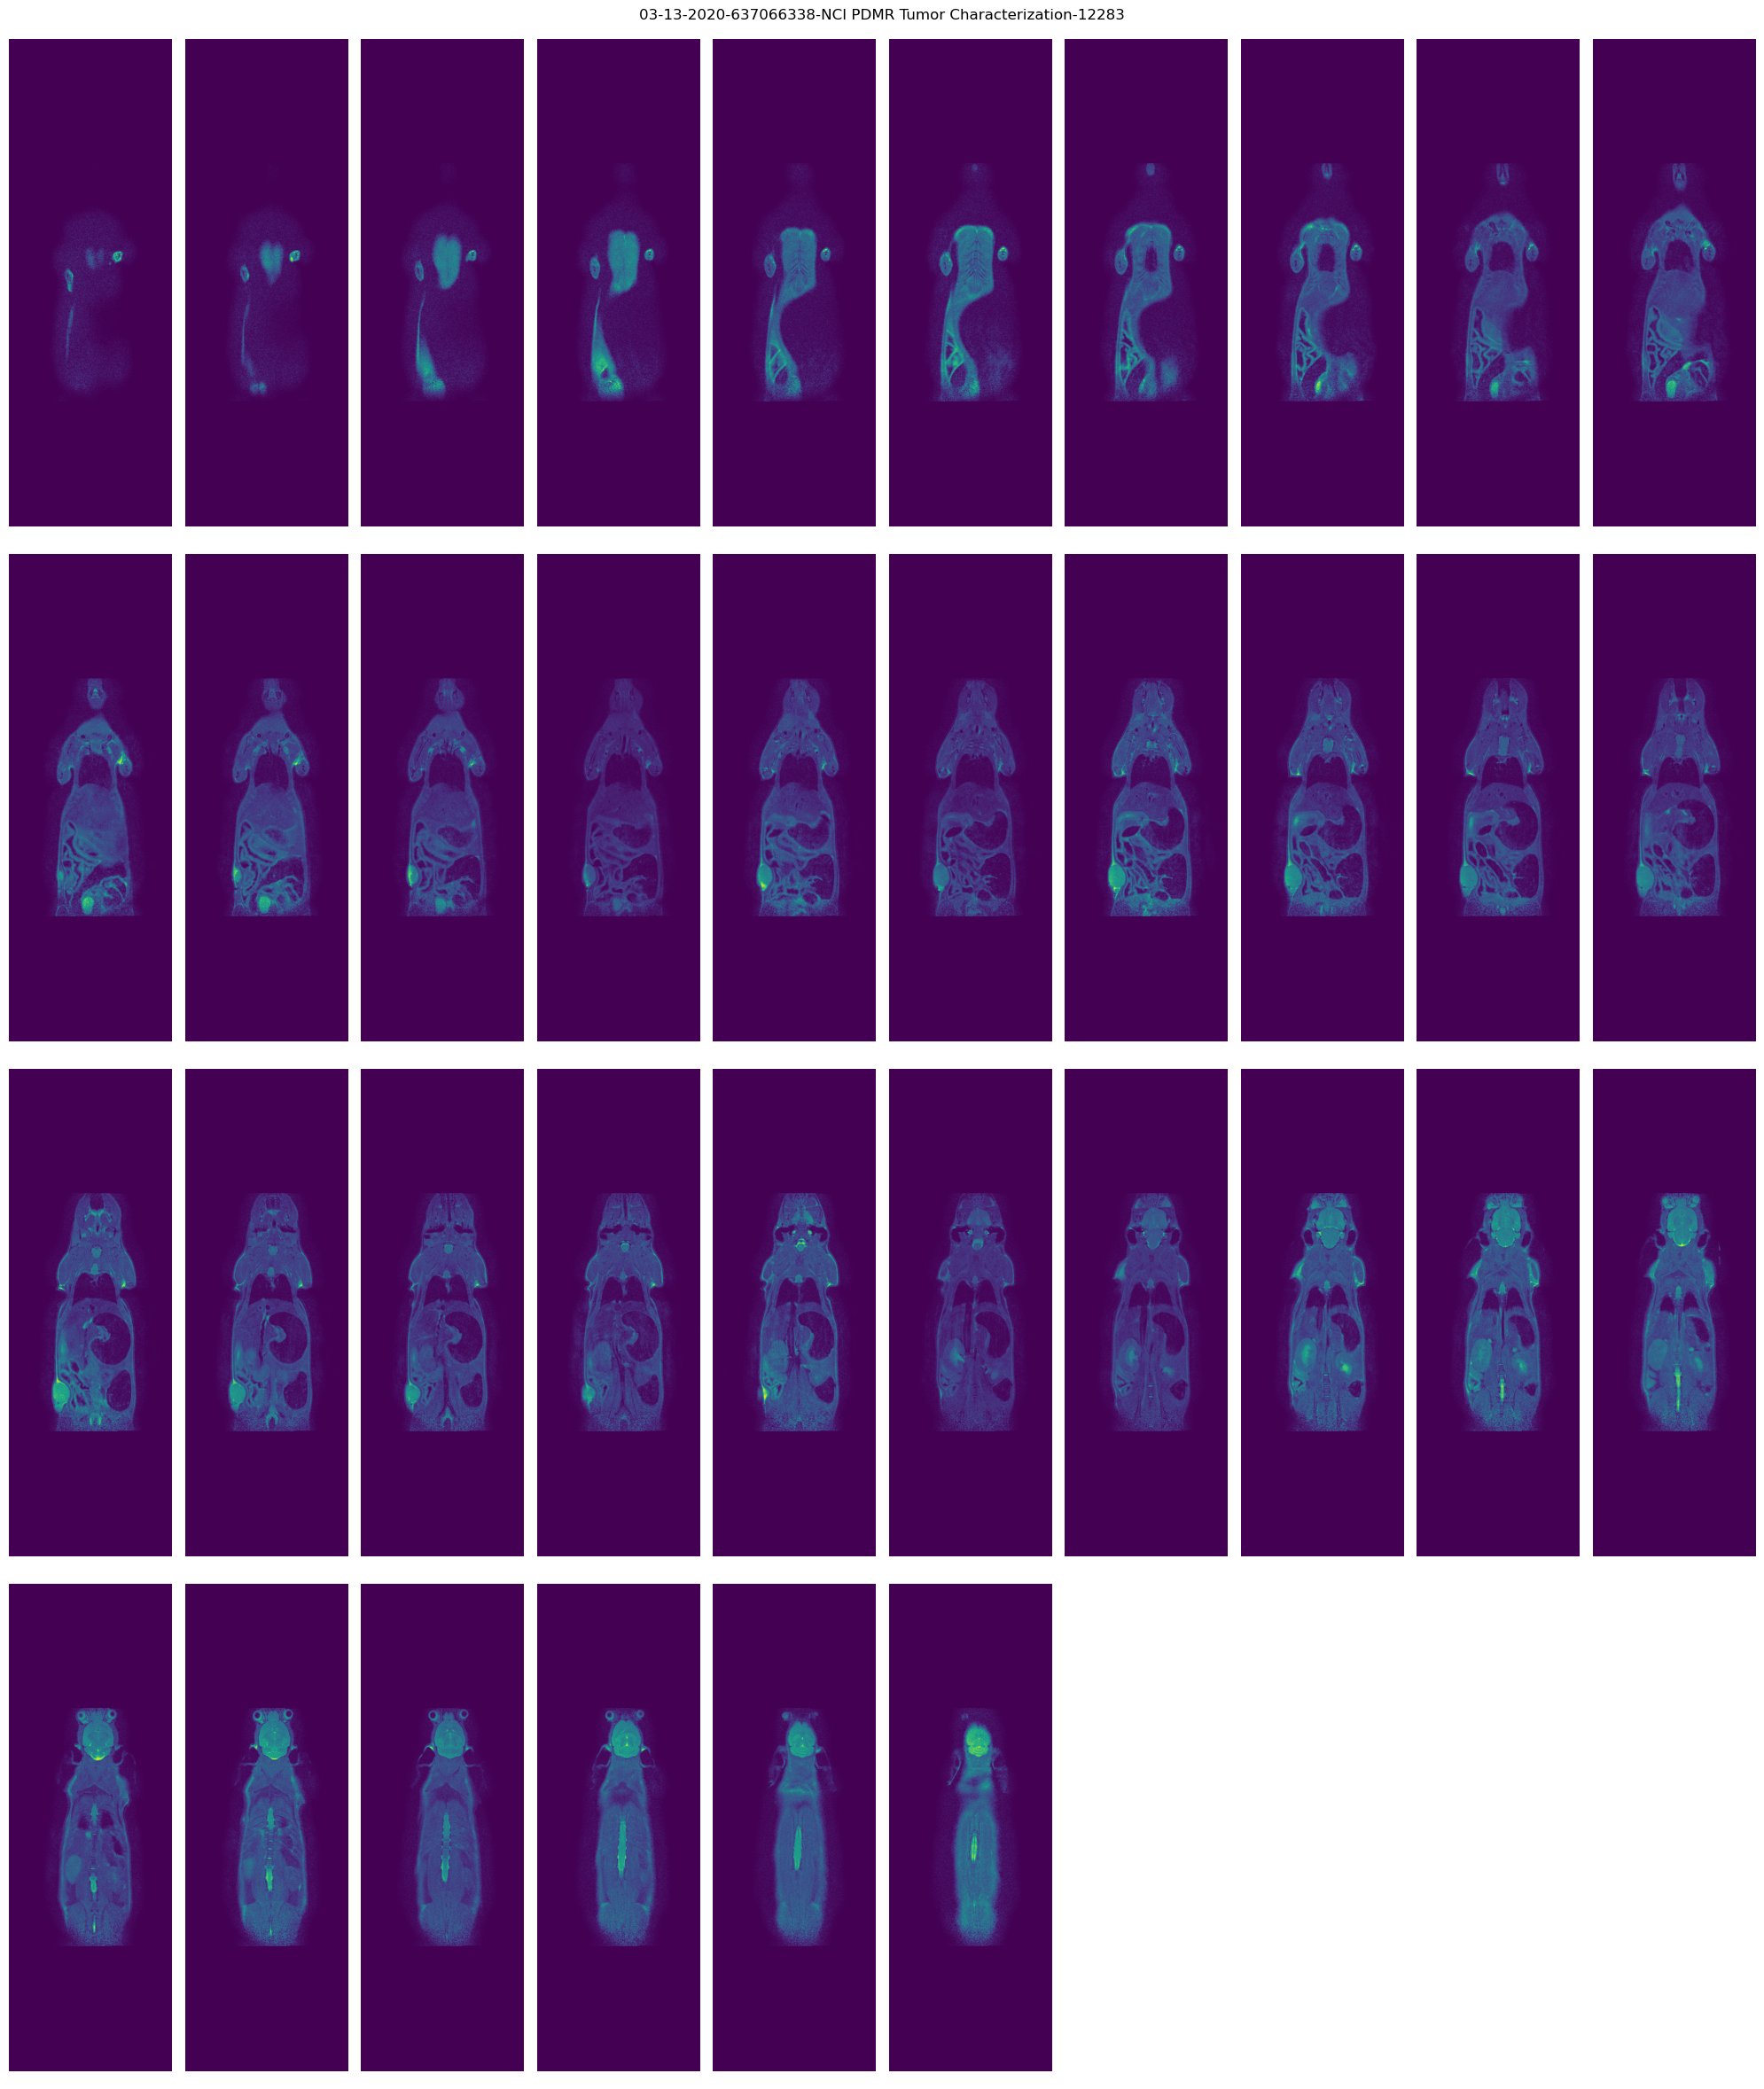

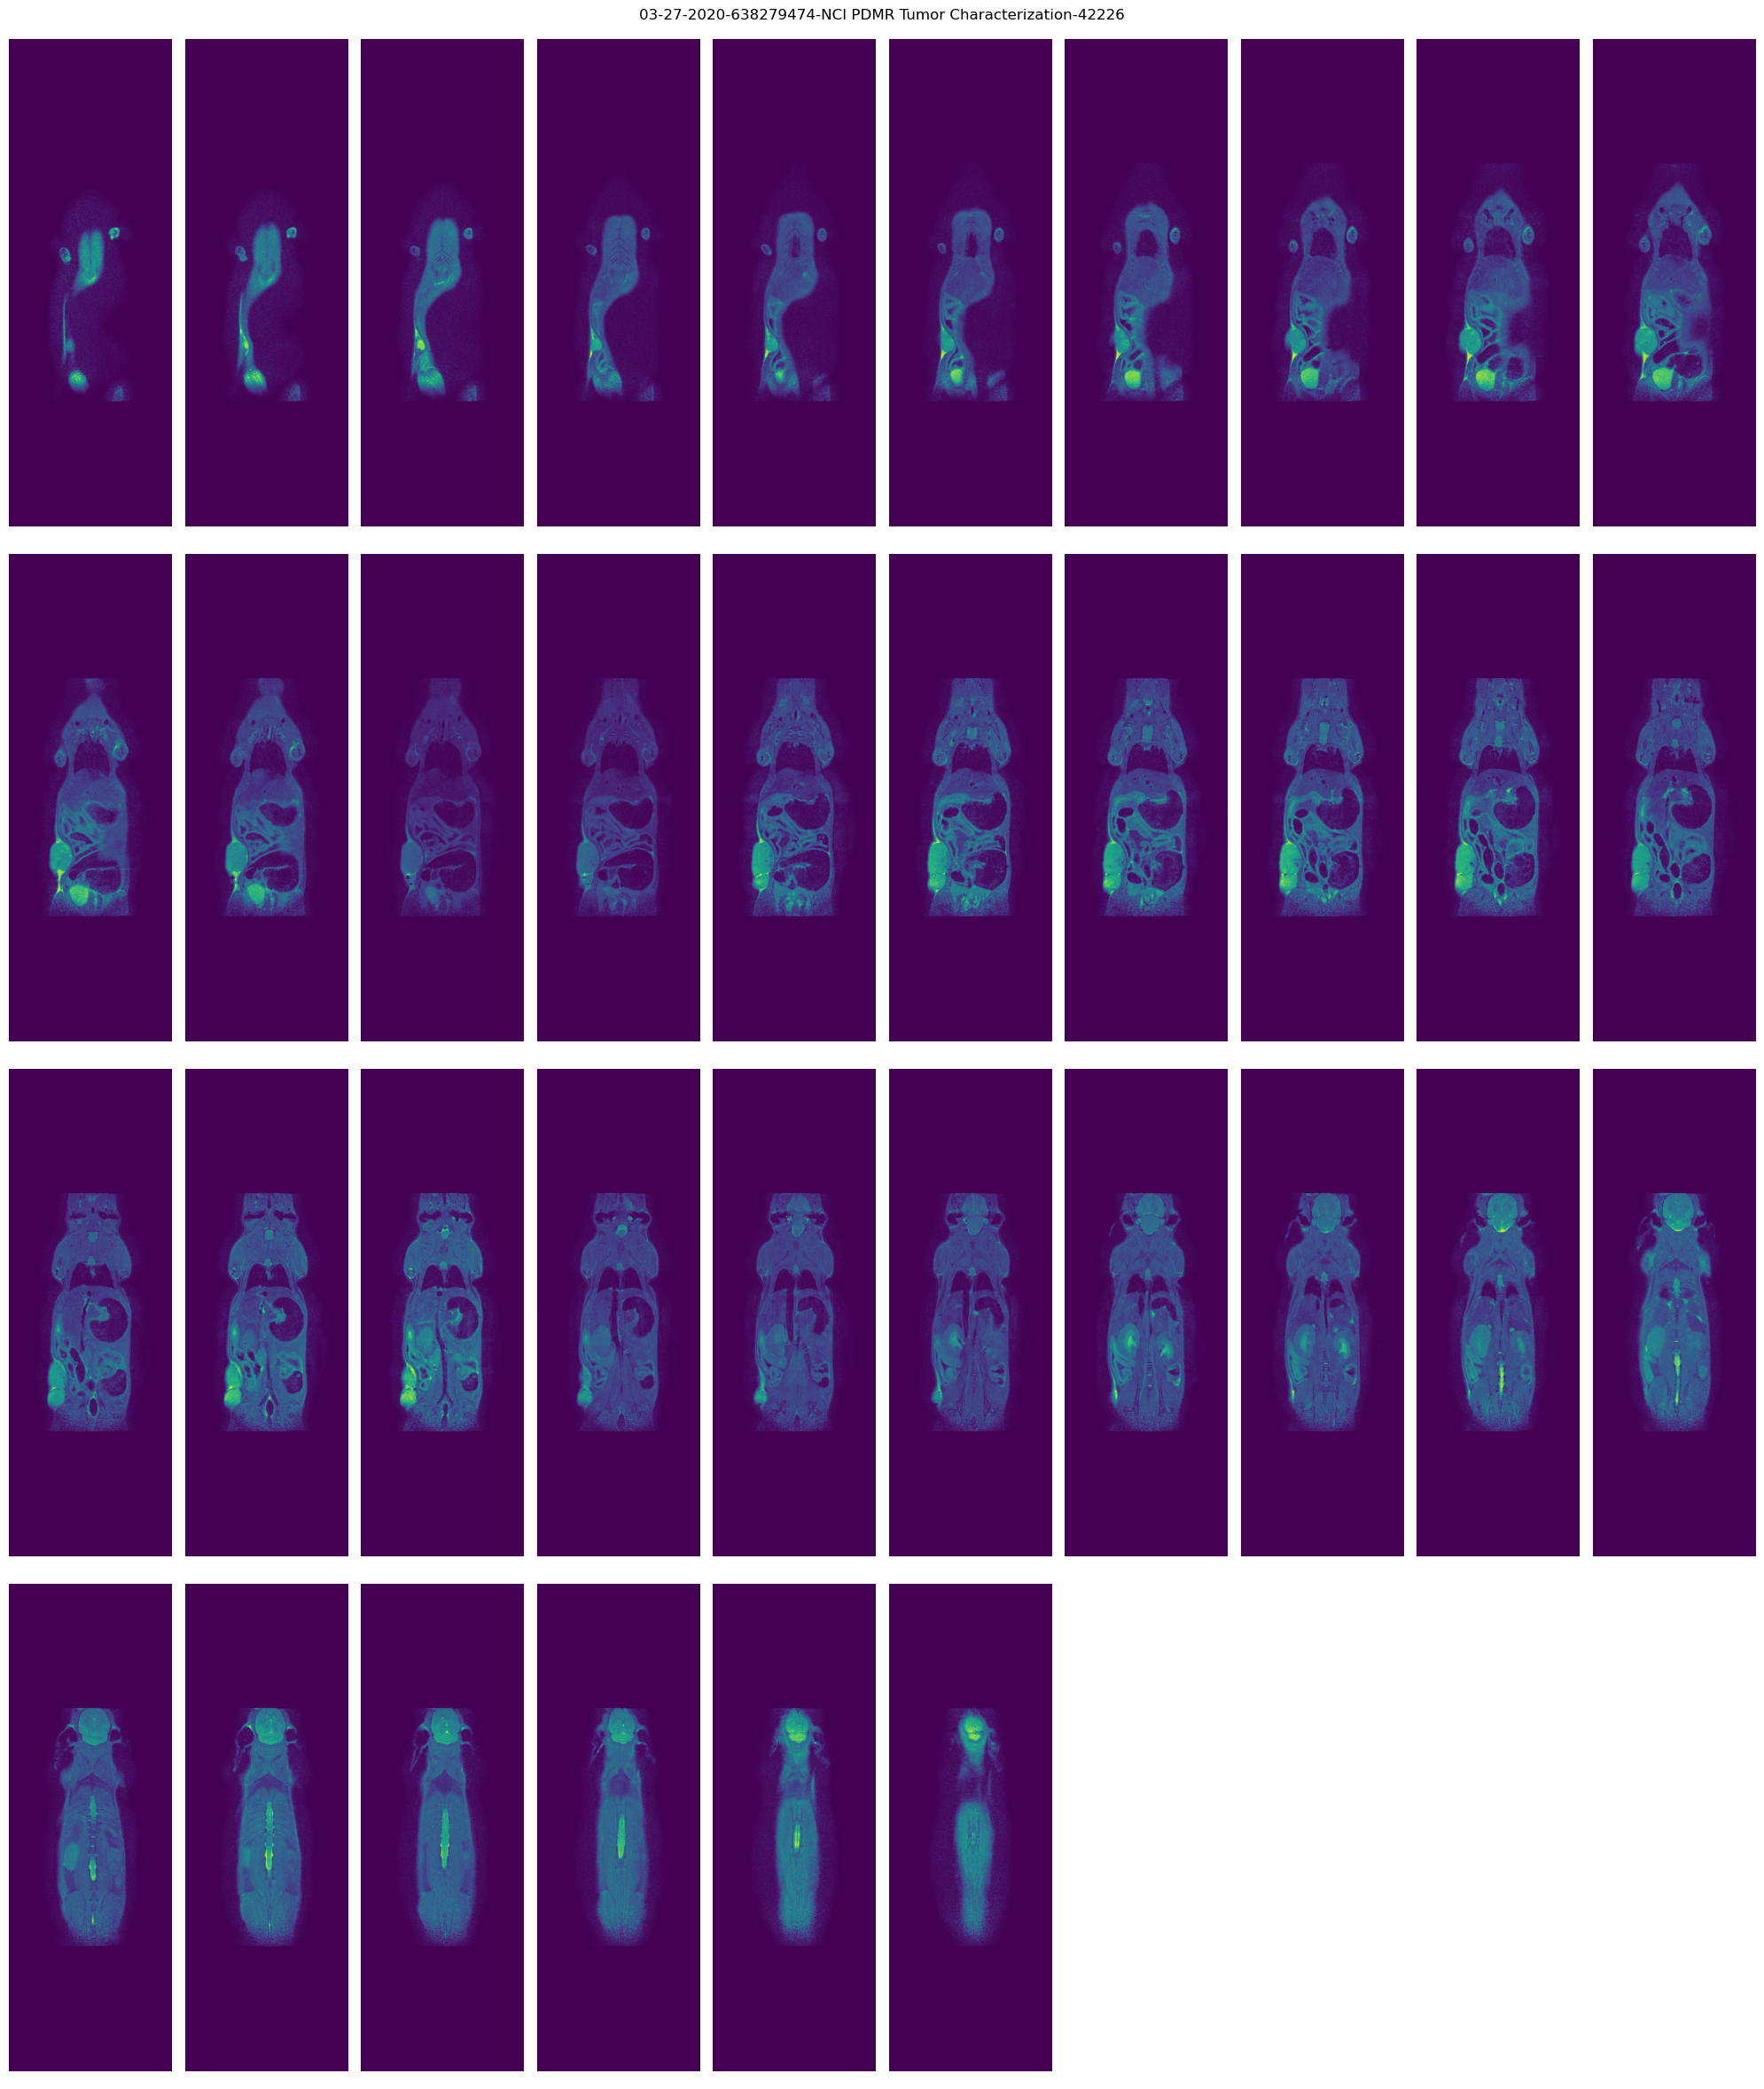

In [7]:
n_cols = 10

def plot_scan(image_paths):
    N = len(scan_image_paths)
    n_rows = int(np.ceil(N / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 24))
    axes = axes.flatten()
    for i, img_path in enumerate(image_paths):
        ds = dicom.dcmread(img_path)
        ds.pixel_array
        axes[i].imshow(ds.pixel_array)
        axes[i].axis('off')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off') 
    return fig, axes

lvl1_keys = list(data_dict.keys())[0:1]
for key1 in lvl1_keys:
    lvl2_data = data_dict[key1]
    lvl2_keys = list(lvl2_data.keys())

    for key2 in lvl2_keys[0:3]:
        lvl3_data = data_dict[key1][key2]
        lvl3_keys = list(lvl3_data.keys())
        for scan_name in lvl3_keys[1:2]: # Chosing second folder as it usually contains the correct scan with multiple images
            scan_image_paths = data_dict[key1][key2][scan_name]
            fig, axes = plot_scan(scan_image_paths)
            fig.suptitle(key2) 
            fig.tight_layout()
            fig.subplots_adjust(top=0.97)
        #plt.subplots_adjust(wspace=0.1, hspace=0.1)